In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import geopandas as gp
import csv
import shapely
from fiona import crs

# Make plots prettyful
pl.style.use('fivethirtyeight')

In [3]:
shp = gp.GeoDataFrame.from_file('../data/CensusTracts2010/CensusTracts2010.shp')

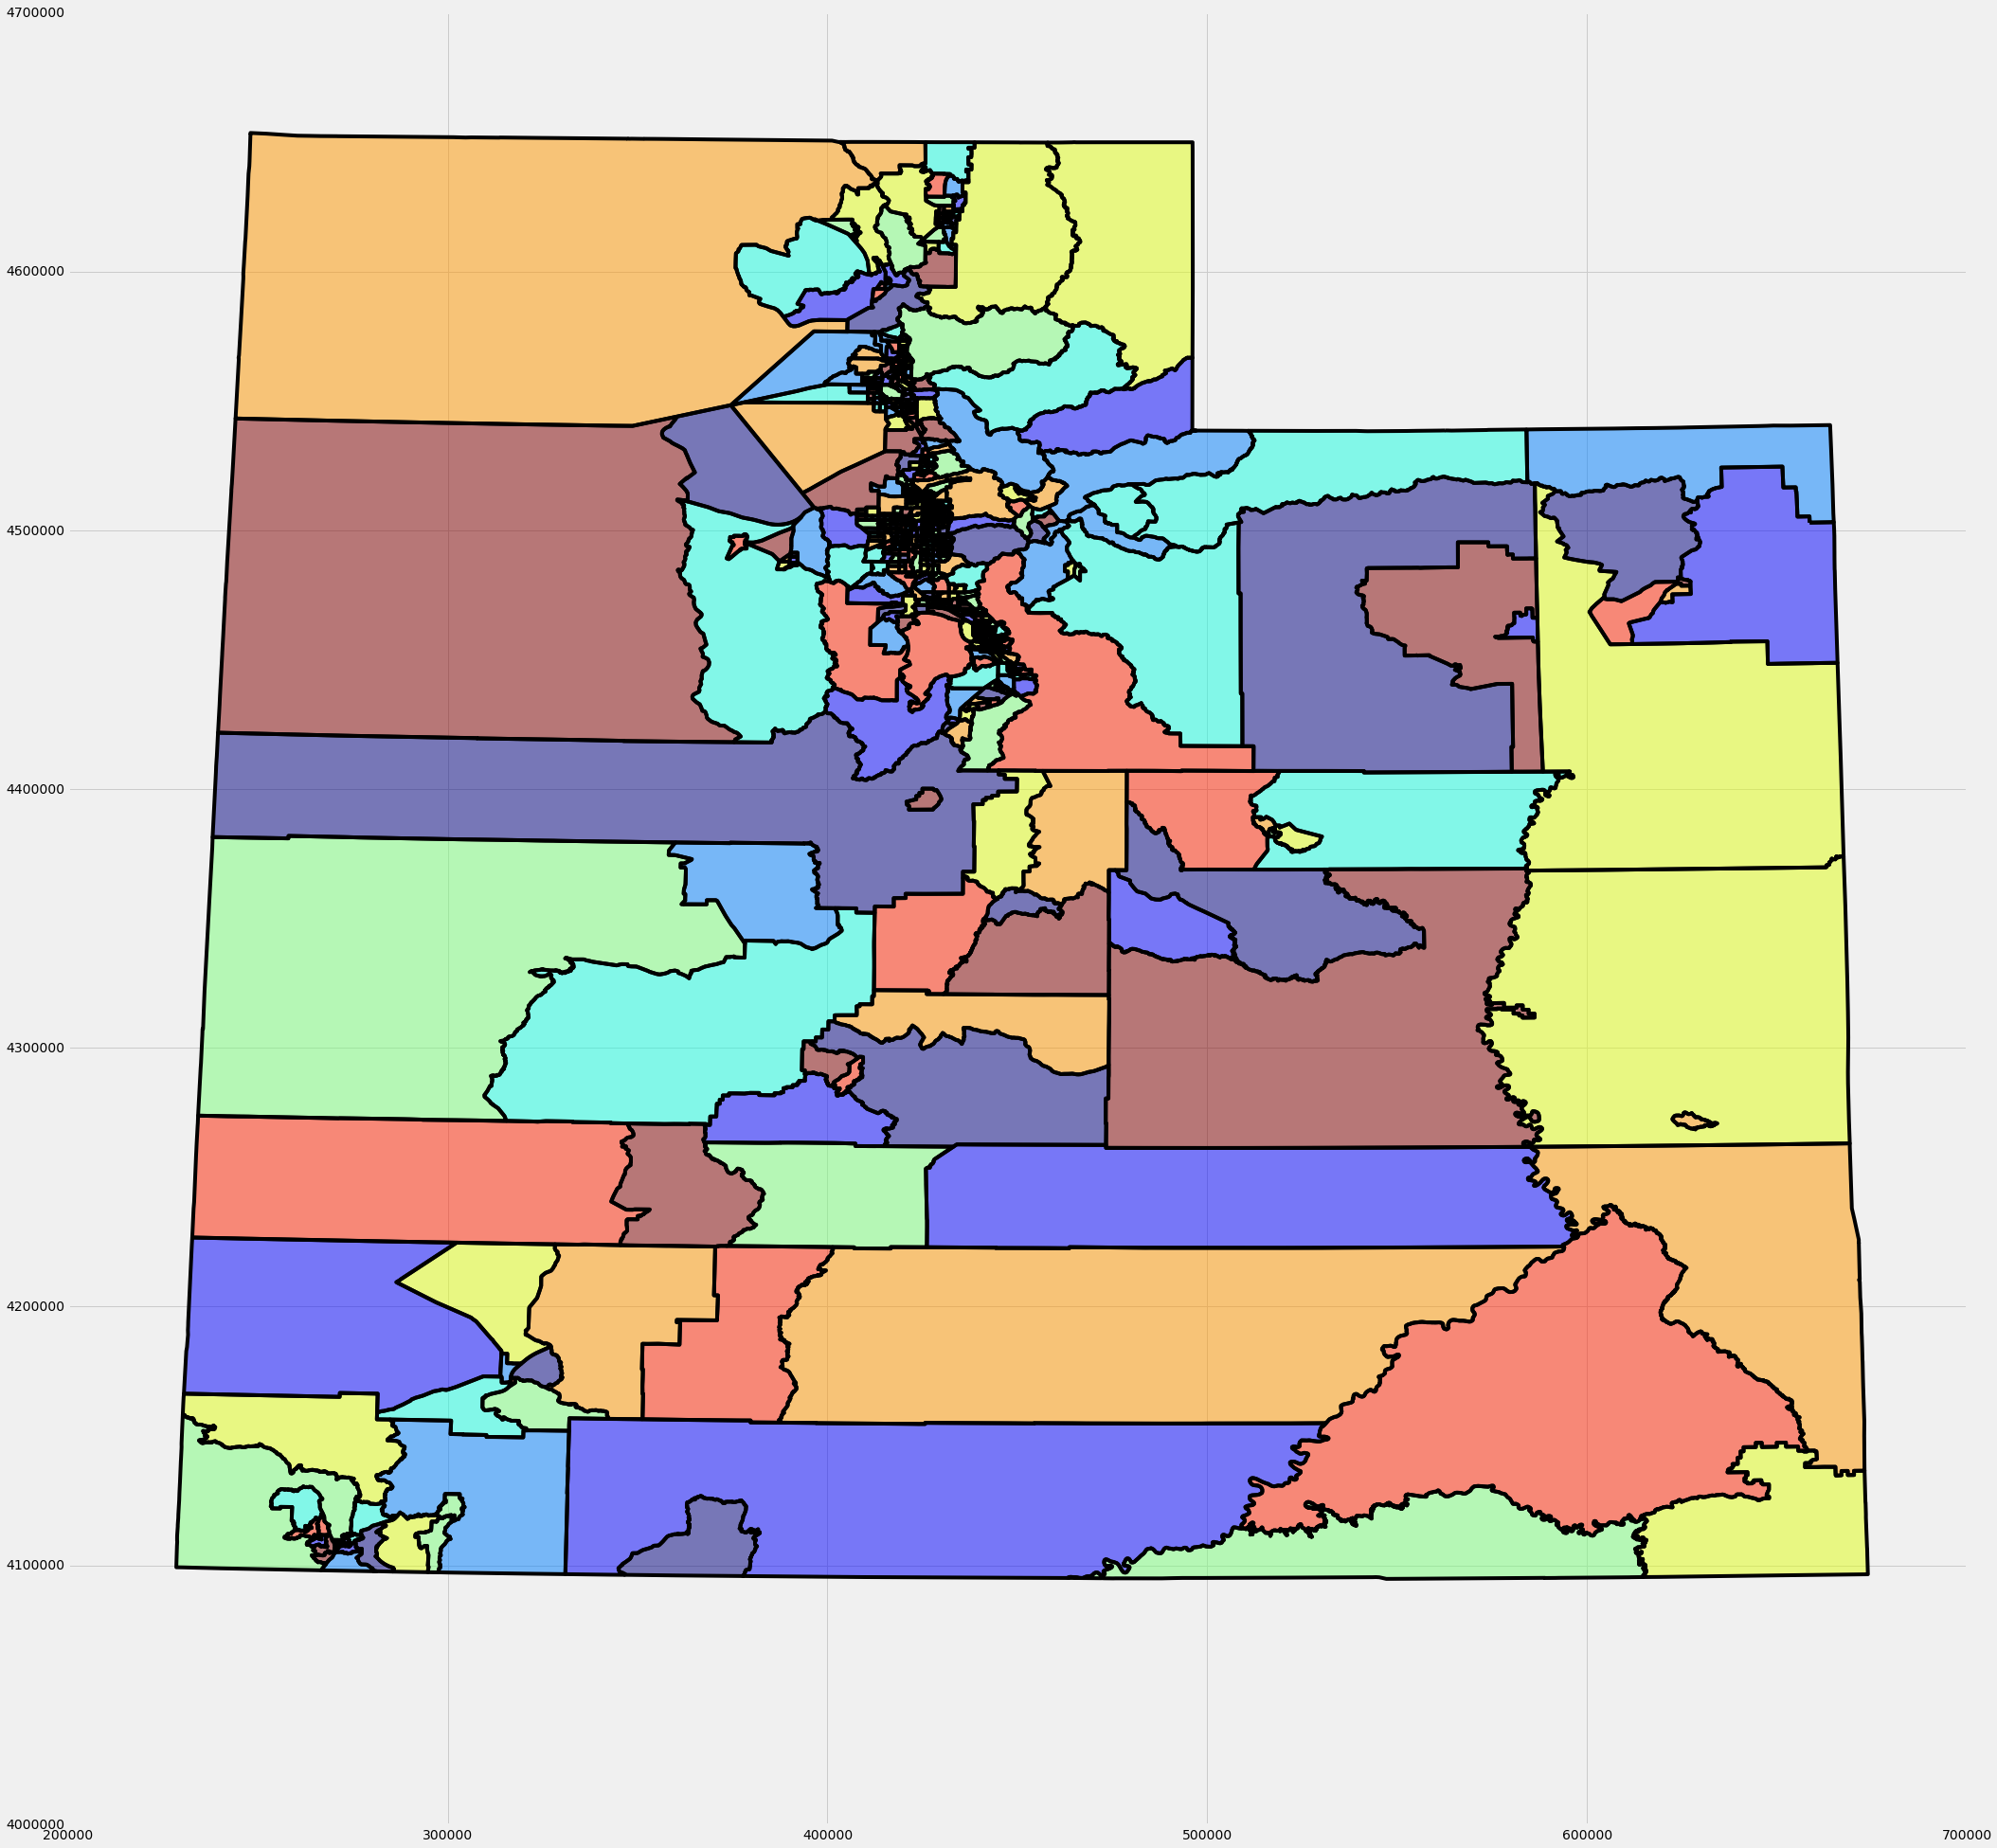

In [6]:
figure, ax = pl.subplots(figsize=(32,32))
shp.plot(axes=ax)

In [11]:
shp['county'] = shp['GEOID10'].str[:5]

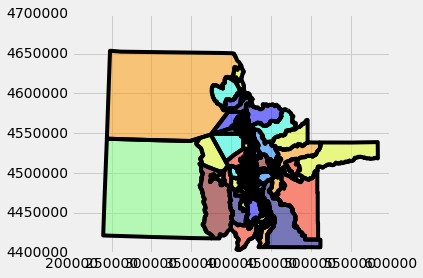

In [15]:
counties = [
    '003', # Box Elder
    '057', # Weber
    '029', # Morgan
    '043', # Summit
    '045', # Tooele
    '011', # Davis
    '035', # Salt Lake
    '051', # Wasatch
    '049', # Utah
]

selector = shp['county'] == '49003'

for c in counties[1:]:
    selector |= shp['county'] == '49' + c

shp = shp[selector]

In [17]:
shp

,AREALAND,AREAWATR,COUNTYFP10,FUNCSTAT10,GEOID10,HU100,INTPTLAT10,INTPTLON10,LOGRECNO,MTFCC,...,P0020009,P0020010,POP100,SHAPE_Area,SHAPE_Leng,STATEFP10,SqMiles,TRACTCE10,geometry,county
0,2185421,0,003,S,49003960601,1395,+41.5159999,-112.0089180,0000009,G5020,...,6,9,3720,2.184057e+06,6709.768306,49,0,960601,"POLYGON ((416387.8499999996 4597179.4, 416396....",49003
1,31111836,0,003,S,49003960602,793,+41.5292534,-111.9843889,0000010,G5020,...,4,0,2429,3.109212e+07,31613.346713,49,0,960602,"POLYGON ((420013.2699999996 4594318.32, 419931...",49003
2,3141945,0,003,S,49003960702,861,+41.4966363,-112.0069151,0000012,G5020,...,3,0,2281,3.139977e+06,7088.986151,49,0,960702,"POLYGON ((416042.5199999996 4593339, 416011.83...",49003
3,657894066,101858980,003,S,49003960400,1632,+41.5599748,-112.2854779,0000007,G5020,...,2,8,4872,7.593605e+08,147127.817051,49,0,960400,"POLYGON ((401208.5 4617355.859999999, 401225.0...",49003
4,35869732,0,003,S,49003960300,2748,+41.7027473,-112.1516054,0000006,G5020,...,14,9,8186,3.584914e+07,43217.386877,49,0,960300,"POLYGON ((401208.5 4617355.859999999, 401131.8...",49003
5,259632270,547505,003,S,49003960200,2303,+41.7070478,-112.0582397,0000005,G5020,...,18,1,6901,2.600234e+08,123915.036320,49,0,960200,"POLYGON ((414492.2699999996 4614046.789999999,...",49003
6,13530750501,2288874480,003,S,49003960100,1336,+41.5165611,-113.1734542,0000004,G5020,...,4,5,3152,1.582051e+10,592611.297483,49,0,960100,"POLYGON ((400590.71 4620003.119999999, 400524....",49003
7,11770838,6306,003,S,49003960802,1411,+41.4691763,-112.0387186,0000014,G5020,...,10,6,4440,1.176990e+07,16376.693539,49,0,960802,"POLYGON ((413820.2300000005 4589785.92, 413823...",49003
8,3948618,0,003,S,49003960701,1661,+41.4956670,-112.0270089,0000011,G5020,...,5,0,4765,3.946177e+06,9006.322079,49,0,960701,"POLYGON ((412959.1299999999 4593422.27, 412975...",49003
9,182259243,42392196,003,S,49003960801,1447,+41.4243768,-111.9938780,0000013,G5020,...,7,5,4206,2.245106e+08,94050.488970,49,0,960801,"POLYGON ((413823.54 4589776, 413820.2300000005...",49003


In [21]:
shp = shp.to_crs(epsg=4326)

In [22]:
centers = pd.DataFrame({
    'tract': shp['GEOID10'], 
    'lat': shp.apply(lambda x: x['geometry'].centroid.y, axis=1),
    'lon': shp.apply(lambda x: x['geometry'].centroid.x, axis=1)
})

In [23]:
centers

,lat,lon,tract
0,41.516000,-112.008918,49003960601
1,41.529257,-111.984396,49003960602
2,41.496637,-112.006915,49003960702
3,41.562465,-112.282525,49003960400
4,41.702748,-112.151615,49003960300
5,41.717508,-112.080067,49003960200
6,41.518038,-113.174138,49003960100
7,41.469986,-112.037066,49003960802
8,41.495667,-112.027009,49003960701
9,41.423469,-112.000525,49003960801


In [25]:
centers.to_csv('tract_centers.csv', index=False)